In [11]:
from matplotlib import colors
#from matplotlib.lines import LineStyle
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [17]:
ticker = 'GBPUSD=X'

start = dt.datetime(2020,1,1)
end = dt.datetime.now()

In [18]:
data = web.DataReader(ticker, 'yahoo', start, end)
#Check the Adjusted close price and drop the null values
delta =  data['Adj Close'].diff(1)
delta.dropna(inplace=True)

#Check for the postive and Negative Movement, and save them
positive = delta.copy()
negative = delta.copy()

positive[positive < 0] = 0
negative[negative > 0] = 0

#Specify a time period for the RSI indicator
days = 14

In [19]:
#Calculate the two important values for the RSI(The Average Gain and Average Loss)
average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean()) #abs is the absolute number

relative_strength = average_gain / average_loss #The formula for the RSI
RSI = 100.0 -(100.0 /(1.0 + relative_strength))

In [20]:
#Lets Plot the RSI
 
combined = pd.DataFrame()
combined['Adj Close'] = data['Adj Close']
combined['RSI'] = RSI

<ipython-input-21-7ba86458f25c>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.axhline(0, LineStyle='--', alpha = 0.5, color='lightgray')
<ipython-input-21-7ba86458f25c>:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.axhline(30, LineStyle='--', alpha = 0.5, color='lightgray')
<ipython-input-21-7ba86458f25c>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.axhline(50, LineStyle='--', alpha = 0.5, color='lightgray')
<ipython-input-21-7ba86458f25c>:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.axhline(70, LineStyle='--', alpha = 0.5, color='lightgray')


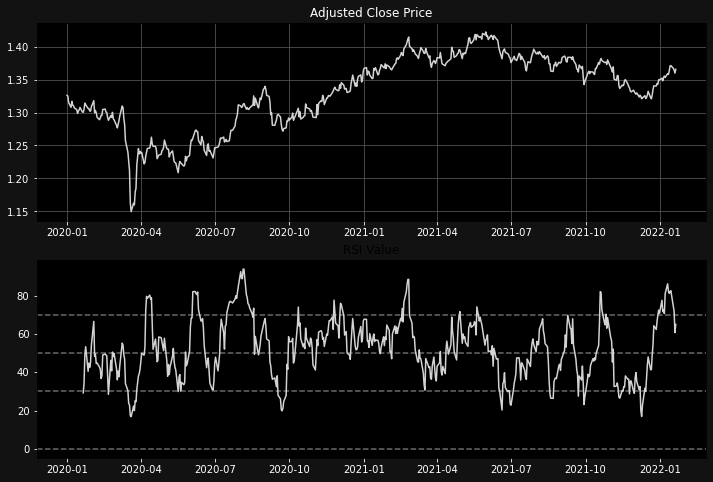

In [21]:
#Plot the Chart
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color = 'lightgray')
ax1.set_title("Adjusted Close Price", color ='white')

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

#Plot the RSI Values
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(combined.index, combined['RSI'], color='lightgray')
ax2.axhline(0, LineStyle='--', alpha = 0.5, color='lightgray')
ax2.axhline(30, LineStyle='--', alpha = 0.5, color='lightgray')
ax2.axhline(50, LineStyle='--', alpha = 0.5, color='lightgray')
ax2.axhline(70, LineStyle='--', alpha = 0.5, color='lightgray')


ax2.set_title("RSI Value")
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.figure.set_facecolor('#121212')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

plt.show()